# sINDEL.MDKT.superSet Length Analysis

In [ ]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix as cm
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt 

In [66]:
cur_dirname = os.getcwd()
path = cur_dirname+"/sINDEL.MDKT.superSet.v1.2.vcf/sINDEL.MDKT.superSet.v1.2.vcf"
superSet = pd.read_csv(path, sep='\t',comment='#',header=None)
print(superSet)

         0          1            2   3      4  5                    6   \
0      chr1      36890            .  CT      C  .  Tier4C;Unclassified   
1      chr1      62297  rs544370662   T  TCTTC  .  Tier4C;Unclassified   
2      chr1      77849            .   A    ATG  .  Tier4C;Unclassified   
3      chr1      83120            .   A  ATAAC  .  Tier4C;Unclassified   
4      chr1      89763            .   G   GAAT  .  Tier4C;Unclassified   
...     ...        ...          ...  ..    ... ..                  ...   
19906  chrX  155991517            .  GT      G  .  Tier4C;Unclassified   
19907  chrX  155992300            .   C     CT  .  Tier4C;Unclassified   
19908  chrX  156002347            .  CA      C  .      Tier1C;HighConf   
19909  chrX  156014317            .   T     TA  .  Tier4C;Unclassified   
19910  chrX  156029656            .  TA      T  .  Tier4C;Unclassified   

                                                      7   \
0      calledSamples=NS_T_3.bowtie,NS_T_4.bowtie,NS

In [67]:
refSeq = superSet[3]
altSeq = superSet[4]

In [68]:
delLength = []
insLength = []

for i in range(len(refSeq)):
    ref = refSeq[i]
    alt = altSeq[i]
    if(ref.startswith(alt)): # Del
        delLength.append(len(ref[len(alt):]))
    elif(alt.startswith(ref)): # Ins
        insLength.append(len(alt[len(ref):]))
    else:
        print(ref + " - "+ alt + " ")

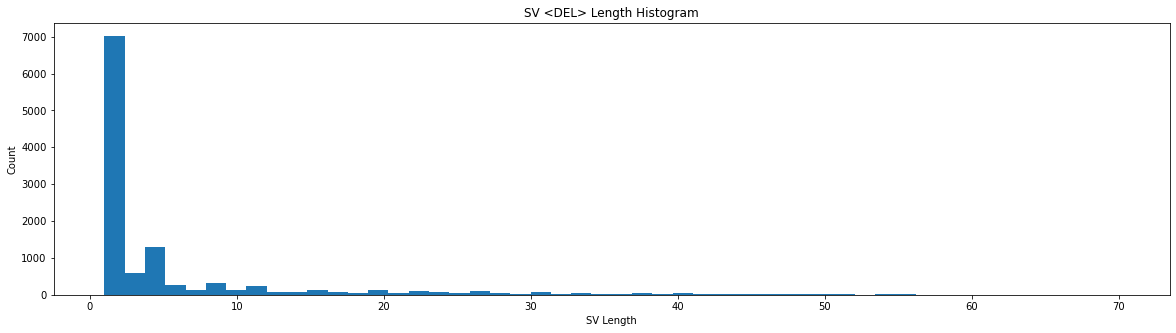

In [69]:
fig, ax = plt.subplots(figsize =(20, 5))
ax.hist(delLength,bins=50)
plt.ylabel("Count")
plt.xlabel("SV Length")
plt.title("SV <DEL> Length Histogram")
# Show plot
plt.show()

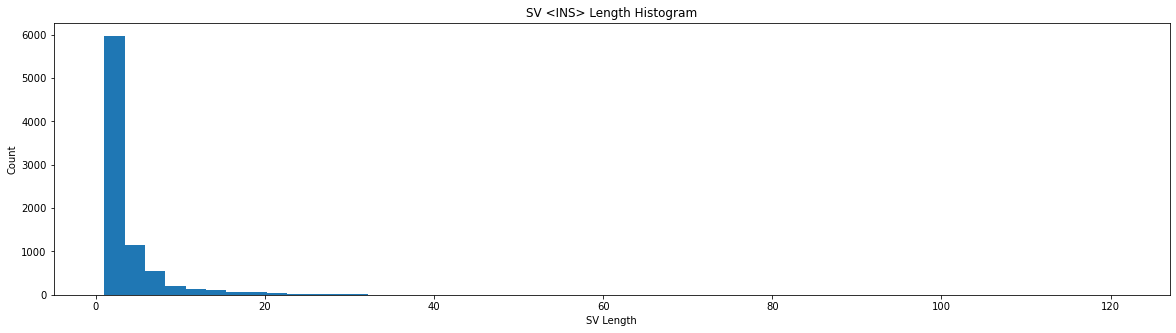

In [70]:
fig, ax = plt.subplots(figsize =(20, 5))
ax.hist(insLength,bins=50)
plt.ylabel("Count")
plt.xlabel("SV Length")
plt.title("SV <INS> Length Histogram")
# Show plot
plt.show()
